In [1]:
# Standard modules
import json
import pickle as pkl
# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load data from json file into dictionary
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [23]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
print(ids[0])

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_3_2


In [29]:
# dict[0] contains the SMILES for the molecule
print(dict[0]['R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_3_2'])

[c:0]12[c:4]3[c:6]4[cH:7][cH:9][c:10]5[c:8]3[c:12]3[c:16]6[c:20]1[C:22]1([CH:21]=[CH:19][C:18]6=[CH:17][CH2:15][C:14]36[CH:13]([CH2:11]5)[O:26]6)[CH:23]([CH2:1][C:2]23[CH:3]([CH2:5]4)[O:24]3)[O:25]1


In [30]:
# dict[1] contains all the individual atomic spectra
spec = dict[1]['R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_3_2']
# with each key being the atom index
print(spec.keys())

dict_keys(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6'])


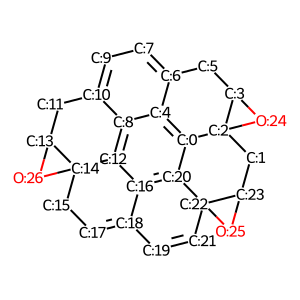

In [44]:
mol = Chem.MolFromSmiles(dict[0][ids[0]])
mol

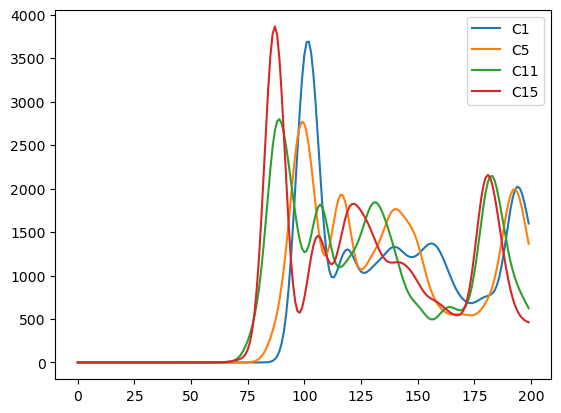

In [40]:
# Plot all CH2 groups
plt.plot(spec['1'], label='C1')
plt.plot(spec['5'], label='C5')
plt.plot(spec['11'], label='C11')
plt.plot(spec['15'], label='C15')
plt.legend()
plt.show()

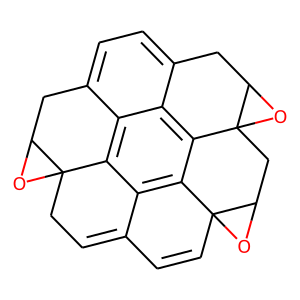

In [54]:
test = '[c]12[c]3[c]4[cH][cH][c]5[c]3[c]3[c]6[c]1[C]1([CH]=[CH][C]6=[CH][CH2][C]36[CH]([CH2]5)[O]6)[CH]([CH2][C]23[CH]([CH2]4)[O]3)[O]1'
aa = Chem.MolFromSmiles(test)
aa


In [2]:
# Path raw directory containing the data
path = "./"
# Load and create the dataset
dataset = XASDataset(path)

In [3]:
# Show detail of the dataset
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

XASDataset(7946)
------------
Number of graphs: 7946
Number of features: 16
Number of classes: 1536450


In [4]:
# Show details of the first molecule/graph in dataset
data = dataset[0]

print(data)
print('------------')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[32, 16], edge_index=[2, 78], y=[200], edge_attrs=[78, 7], vector=[16], idx=[1], smiles='[c:0]12[c:4]3[c:8]4[c:10]5[c:11]([CH:25]=[O:29])[cH:13][c:14]6[c:12]4[c:17]4[c:19]([c:18]([CH:26]=[O:31])[c:15]6[OH:16])=[CH:20][CH:22]6[C:23]([c:21]14)([CH:24]=[CH:1][C:2]2=[CH:3][CH2:5][C:6]3([CH:27]=[O:30])[CH:7]=[CH:9]5)[O:28]6', atom_num=[1], neigbors=[3])
------------
Number of nodes: 32
Number of edges: 78
Average node degree: 2.44
Has isolated nodes: False
Has self loops: False
Is undirected: True


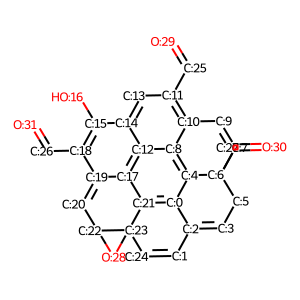

In [5]:
mol = Chem.MolFromSmiles(data.smiles)
mol

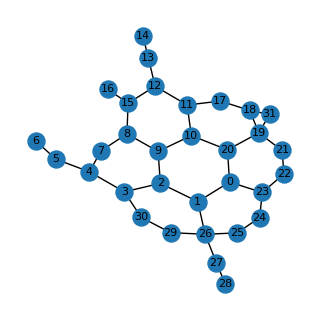

In [6]:
mol_graph = to_networkx(data, to_undirected=True)

plt.figure(figsize=(3,3))

nx.draw(mol_graph, with_labels=True, node_size=150, font_size=8)

plt.show()

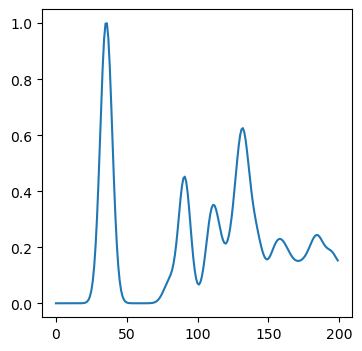

In [7]:
# Show molecule spectrum
plt.figure(figsize=(4,4))

plt.plot(data.y)

plt.show()

In [8]:
train_dataset = dataset[0:300]
val_dataset = dataset[300:330]
test_dataset = dataset[330:375]

In [9]:
type(train_dataset)

Dataset.XASDataset

In [10]:
print(train_dataset[0])
print(train_dataset[0].neigbors)

Data(x=[32, 16], edge_index=[2, 78], y=[200], edge_attrs=[78, 7], vector=[16], idx=[1], smiles='[c:0]12[c:4]3[c:8]4[c:10]5[c:11]([CH:25]=[O:29])[cH:13][c:14]6[c:12]4[c:17]4[c:19]([c:18]([CH:26]=[O:31])[c:15]6[OH:16])=[CH:20][CH:22]6[C:23]([c:21]14)([CH:24]=[CH:1][C:2]2=[CH:3][CH2:5][C:6]3([CH:27]=[O:30])[CH:7]=[CH:9]5)[O:28]6', atom_num=[1], neigbors=[3])
[12, 16, 8]


In [11]:
if train_dataset[0].x[1,1] == 1:
    print('yes')

yes


In [12]:
bond_o = []

for z in range(len(train_dataset)):

    neig = train_dataset[z].neigbors

    for i in enumerate(neig):
        if train_dataset[z].x[i[1],2] == 0:
            bond_o.append(train_dataset[z].y)


In [15]:
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [25]:
ids = list(dict[0].keys())

In [32]:
dict[1][ids[0]]

{'7': [2.2422877413810823e-32,
  4.445664220887121e-31,
  8.333192317184913e-30,
  1.4767792598526795e-28,
  2.474282003960004e-27,
  3.9193336912296225e-26,
  5.869548797267884e-25,
  8.310489912034527e-24,
  1.1124435136985977e-22,
  1.4078576401136268e-21,
  1.6844919823696358e-20,
  1.905498392890784e-19,
  2.037875545418468e-18,
  2.0605168063005142e-17,
  1.9697181958272723e-16,
  1.7801699468698842e-15,
  1.5210667236447736e-14,
  1.2287527369837438e-13,
  9.3844789263934e-13,
  6.7761851029751066e-12,
  4.6258313056218056e-11,
  2.985545905354923e-10,
  1.8217431613668564e-09,
  1.0509449676602924e-08,
  5.731947901512013e-08,
  2.955656270527626e-07,
  1.4409040111513757e-06,
  6.6411854366457425e-06,
  2.8939138332115326e-05,
  0.00011922161952572747,
  0.00046435900367885986,
  0.0017099450594462702,
  0.005953054727554705,
  0.01959417695679729,
  0.06097384873427417,
  0.17938644550450003,
  0.4989592432841347,
  1.3121091155187228,
  3.262152541806553,
  7.667751158031184

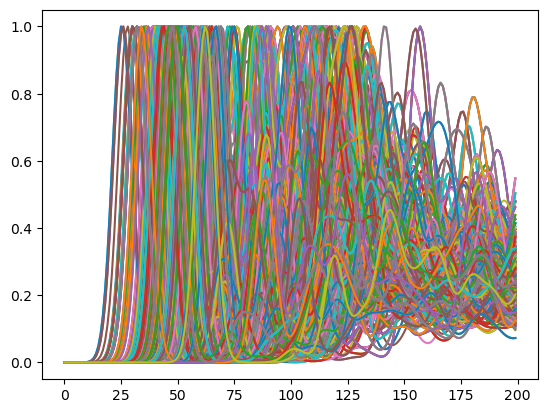

In [64]:
for i in range(len(bond_o)):
    plt.plot(bond_o[i])

plt.show()

In [9]:
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=30, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)

In [10]:
print(f'Length of training data loader: {len(train_loader.dataset)}')
print(f'Length of validation data loader: {len(val_loader.dataset)}')
print(f'Length of testing data loader: {len(test_loader.dataset)}')

Length of training data loader: 300
Length of validation data loader: 30
Length of testing data loader: 45


In [11]:
print(train_loader.dataset[1])
print(train_loader.dataset[1].vector)
print(train_loader.dataset[1].atom_num)
print(train_loader.dataset[1].neigbors)

Data(x=[29, 16], edge_index=[2, 76], y=[200], edge_attrs=[76, 7], vector=[16], idx=[1], smiles='[c:0]12[c:2]3[cH:1][cH:25][c:24]4[c:22]1[c:17]1[c:13]5[c:15]([cH:16][cH:18][c:19]1[c:20]([OH:21])[cH:23]4)[CH:14]1[CH:12]([C:11]4=[C:9]5[C:4]25[C:6]([C:5]([OH:8])=[CH:3]3)([CH:7]2[CH:10]4[O:26]2)[O:28]5)[O:27]1', atom_num=[1], neigbors=[4])
tensor([0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5920, 0.4080, 0.5300,
        0.4700, 0.0000, 0.0000, 0.0000, 0.5920, 0.4080, 0.5920])
tensor([20])
[19, 21, 24, 27]


In [12]:
class NN(torch.nn.Module):

    def __init__(self):
        
        super(NN, self).__init__()

        self.lin1 = torch.nn.Linear(16, 50)
        self.lin2 = torch.nn.Linear(50, 100)
        self.lin3 = torch.nn.Linear(100, 150)
        self.lin4 = torch.nn.Linear(150, 200)

    def forward(self, batched_data):

        batch_size = batched_data.vector.shape[0] // 16
        batched_data.vector = batched_data.vector.view(batch_size, 16)

        x = batched_data.vector.float()

        p = torch.nn.LeakyReLU(0.1)

        x = self.lin1(x)
        x = p(self.lin2(x))
        x = p(self.lin3(x))
        x = p(self.lin4(x))

        return x

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NN()
print(model)
model = model.to(device)

NN(
  (lin1): Linear(in_features=16, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=150, bias=True)
  (lin4): Linear(in_features=150, out_features=200, bias=True)
)


In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, amsgrad=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, min_lr=0.000001)

In [15]:
def train(epoch):

    model.train()
    loss_all = 0

    for batch in train_loader:

        batch = batch.to(device)

        optimizer.zero_grad()

        pred = model(batch)
        batch_size = batch.y.shape[0] // 200
        batch.y = batch.y.view(batch_size, 200)

        loss = nn.MSELoss()(pred.double(), batch.y.double())

        loss.backward()

        loss_all += loss.item() * batch.num_graphs

        optimizer.step()

    return loss_all / len(train_loader.dataset)

In [16]:
def test(loader):

    model.eval()
    loss_all = 0

    for batch in loader:
        batch = batch.to(device)

        batch_size = batch.y.shape[0] // 200
        batch.y = batch.y.view(batch_size, 200)

        with torch.no_grad():
            pred = model(batch)

        loss = nn.MSELoss()(pred.double(), batch.y.double())

        loss_all += loss.item() * batch.num_graphs

    return loss_all / len(loader.dataset)

In [17]:
epochs = 1000
best_val_error = None
train_losses = []
val_losses = []

for epoch in range(epochs):
    
    loss = train(epoch)
    
    val_error = test(val_loader)
    scheduler.step(val_error)
    #scheduler.step(epoch)
    train_losses.append(loss)
    val_losses.append(val_error)
    
    current_lr = optimizer.param_groups[0]['lr']

    if best_val_error is None or val_error <= best_val_error:
        
        best_val_error = val_error
    if epoch% 50 == 0:
        print(f'Epoch: {epoch:03d}, LR: {current_lr:7f}, TrainLoss: {loss:.7f}, ValLoss:{val_error:7f}, Best_ValLoss:{best_val_error:7f}')


Epoch: 000, LR: 0.010000, TrainLoss: 0.0551282, ValLoss:0.044243, Best_ValLoss:0.044243
Epoch: 050, LR: 0.010000, TrainLoss: 0.0375851, ValLoss:0.040950, Best_ValLoss:0.038099
Epoch: 100, LR: 0.010000, TrainLoss: 0.0343928, ValLoss:0.042209, Best_ValLoss:0.038099
Epoch: 150, LR: 0.005000, TrainLoss: 0.0293715, ValLoss:0.042046, Best_ValLoss:0.038099
Epoch: 200, LR: 0.005000, TrainLoss: 0.0282480, ValLoss:0.043482, Best_ValLoss:0.038099
Epoch: 250, LR: 0.002500, TrainLoss: 0.0245246, ValLoss:0.045466, Best_ValLoss:0.038099
Epoch: 300, LR: 0.002500, TrainLoss: 0.0239685, ValLoss:0.045353, Best_ValLoss:0.038099
Epoch: 350, LR: 0.001250, TrainLoss: 0.0220188, ValLoss:0.046822, Best_ValLoss:0.038099
Epoch: 400, LR: 0.001250, TrainLoss: 0.0219393, ValLoss:0.047002, Best_ValLoss:0.038099
Epoch: 450, LR: 0.000625, TrainLoss: 0.0208812, ValLoss:0.047508, Best_ValLoss:0.038099
Epoch: 500, LR: 0.000625, TrainLoss: 0.0208292, ValLoss:0.047901, Best_ValLoss:0.038099
Epoch: 550, LR: 0.000313, TrainL

In [18]:
def pred_spec(model, index, test_dataset):
    # Set the model to evaluation mode
    model.eval()

    # Get a single graph from the test dataset
    graph_index = index # Index of the graph you want to predict on
    graph_data = test_dataset[graph_index].to(device)
    batch = Batch.from_data_list([graph_data])

    # Pass the graph through the model
    with torch.no_grad():
        pred = model(batch)

    # Access the predicted output for the single graph
    pred_graph = pred[0]
    true_spectrum = graph_data.y.cpu().numpy()
    predicted_spectrum = pred.cpu().numpy()
    predicted_spectrum = predicted_spectrum.reshape(-1)
    
    return predicted_spectrum, true_spectrum

In [19]:
# Create empty dictionary to contain spectra
predict = {}
true = {}

# Loop over all molecules in test dateset and assign to dictionary index
for index in range(len(test_dataset)):
    predict[index], true[index] = pred_spec(model, index, test_dataset)

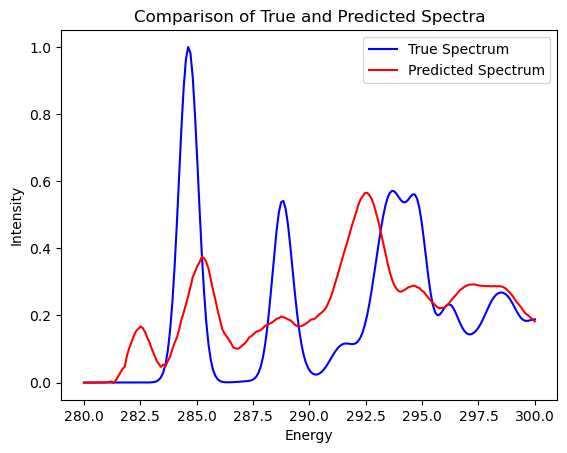

In [26]:
save_var = 0

plot_spectra(predict[7], true[7], save_var)